In [7]:
!pip install textblob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 6.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [11]:
import pandas as pd

# Try with ISO-8859-1 encoding
df = pd.read_csv('./Downloads/redmi6.csv', encoding='ISO-8859-1')
df.head()


,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful


In [15]:
# Drop missing reviews
df = df.dropna(subset=['Review Title'])

# Optional: remove duplicates
df = df.drop_duplicates(subset='Review Title')


In [19]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['Review Title'].apply(get_sentiment)

# This adds a sentiment label (Positive/Negative/Neutral) to each review.

/var/folders/k6/0zqk3bq92jv1dy_qq5p76zz40000gn/T/ipykernel_5491/879682338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


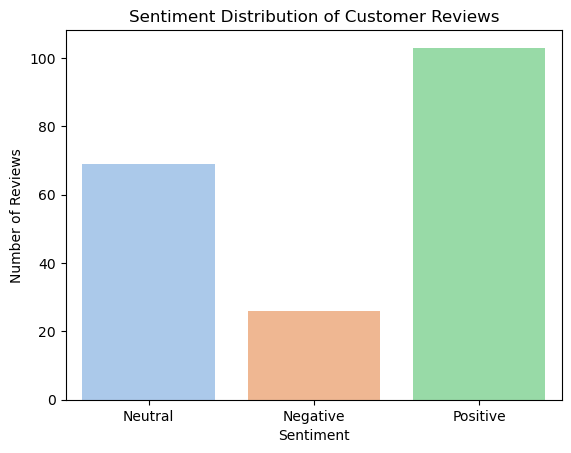

In [21]:
# Visualize Sentiment Distribution
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution of Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


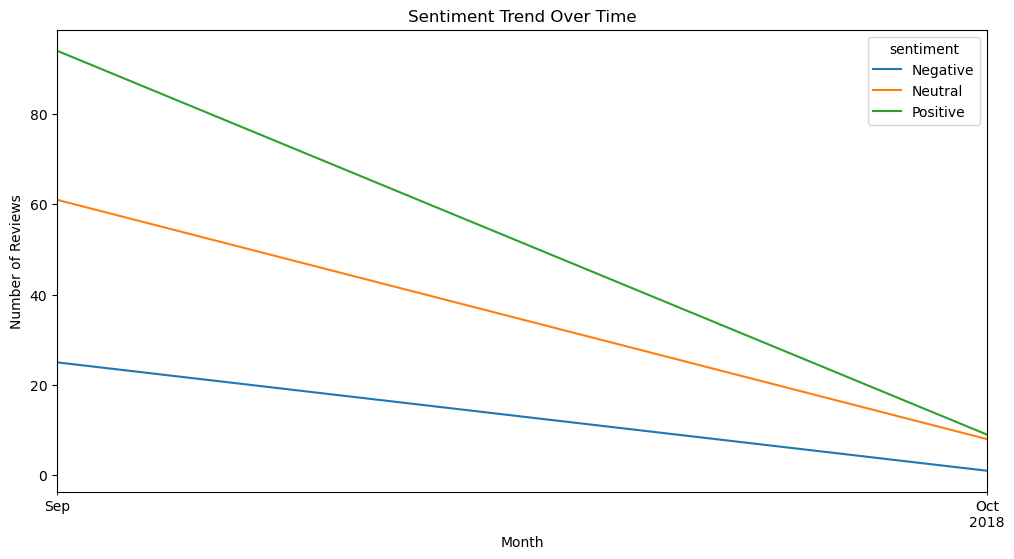

In [23]:
#Trend Analysis

df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.to_period('M')

sentiment_trend = df.groupby(['month', 'sentiment']).size().unstack().fillna(0)

sentiment_trend.plot(kind='line', figsize=(12,6))
plt.title('Sentiment Trend Over Time')
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.show()
